In [29]:
import tensorflow as tf
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [30]:
# train_x : 28*28 행렬 데이터 60000개 존재
# train_y : 정답데이터 600000개
# test_x : 28*28 행렬 데이터 10000개 존재
# test_y : 정답데이터 10000개

print("-----"*15)
print("train_x dimension :", train_x.shape)
print("train_y dimension :", train_y.shape)
print("test_x dimension :", test_x.shape)
print("test_y dimension :", test_y.shape)
print("-----"*15, "\n")

print(train_y[0])
print(train_x[0])

---------------------------------------------------------------------------
train_x dimension : (60000, 28, 28)
train_y dimension : (60000,)
test_x dimension : (10000, 28, 28)
test_y dimension : (10000,)
--------------------------------------------------------------------------- 

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0 

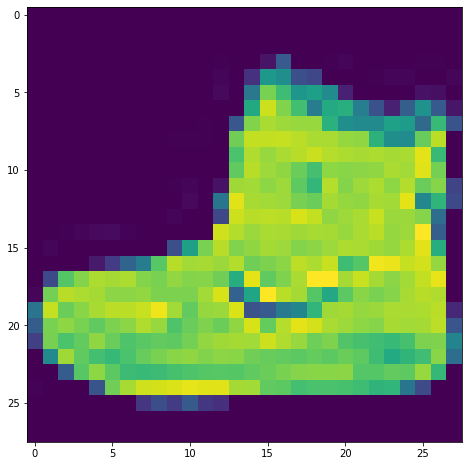

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(train_x[0])
plt.show()

In [32]:
# Normalization
train_x, test_x = train_x / 255.0, test_x / 255.0

In [33]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(train_x, train_y, epochs=30, validation_split=0.25)

Epoch 1/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.5537 - accuracy: 0.8036 - val_loss: 0.4811 - val_accuracy: 0.8281
Epoch 2/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.4506 - accuracy: 0.8377 - val_loss: 0.4385 - val_accuracy: 0.8463
Epoch 3/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.4220 - accuracy: 0.8479 - val_loss: 0.4281 - val_accuracy: 0.8470
Epoch 4/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.4130 - accuracy: 0.8510 - val_loss: 0.4387 - val_accuracy: 0.8497
Epoch 5/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3985 - accuracy: 0.8544 - val_loss: 0.4130 - val_accuracy: 0.8566
Epoch 6/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3908 - accuracy: 0.8587 - val_loss: 0.4152 - val_accuracy: 0.8532
Epoch 7/30
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3883 - accuracy: 0.8599 - val_loss: 0.4146 - val_ac

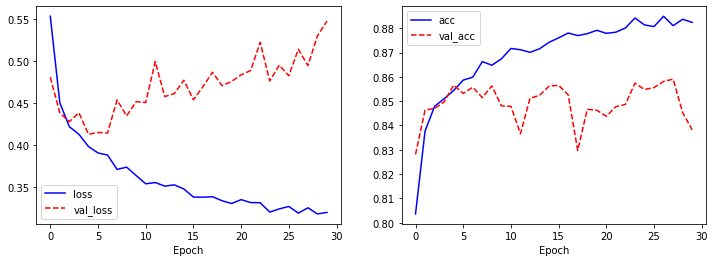

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "b-", label="acc")
plt.plot(history.history["val_accuracy"], "r--", label="val_acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()